In [92]:
import shap

In [114]:
from src.joint_masker import run_shap_vals

shap_vals = run_shap_vals('joint')

Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
20it [00:00, 439194.14it/s]
20it [00:00, 342392.16it/s]
40it [00:00, 645277.54it/s]
120it [00:00, 1563094.66it/s]
120it [00:00, 1516013.49it/s]
120it [00:00, 1480342.59it/s]
120it [00:00, 1539194.13it/s]
120it [00:00, 1218683.97it/s]
120it [00:00, 1421797.97it/s]
120it [00:00, 1421797.97it/s]
120it [00:00, 1020925.92it/s]
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
120it [00:00, 1261444.81it/s]
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
120it [00:00, 478892.94it/s]
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
80it [00:00, 1261444.81it/s]
You seem to be using the pipelines sequent

In [205]:
shap_vals.feature_names

[['Rating',
  'Votes',
  'Revenue (Millions)',
  '',
  'off',
  'beat',
  'romantic',
  'comedy',
  '']]

In [94]:
text_shap_vals = run_shap_vals('text')
tab_shap_vals = run_shap_vals('tab')

Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [199]:
text_shap_vals.clustering

array([[[1.        , 2.        , 0.33333333, 2.        ],
        [3.        , 4.        , 0.33333333, 2.        ],
        [0.        , 6.        , 0.5       , 3.        ],
        [7.        , 5.        , 0.5       , 3.        ],
        [8.        , 9.        , 1.        , 6.        ]]])

In [96]:
shap_vals.base_values

array([[0.42731613, 0.57268387]])

In [198]:
shap.plots.text(text_shap_vals[0], grouping_threshold=)

In [98]:
text_shap_vals.data

(array(['', 'off', 'beat ', 'romantic ', 'comedy', ''], dtype=object),)

In [99]:
shap_vals

.values =
array([[[-0.12221598,  0.12221598],
        [ 0.17356919, -0.17356919],
        [-0.01040681,  0.01040681],
        [ 0.        ,  0.        ],
        [-0.01543996,  0.01543996],
        [-0.01304646,  0.01304646],
        [-0.02219778,  0.02219778],
        [-0.01887642,  0.01887642],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.42731613, 0.57268387]])

.data =
array([[7.7, 398972.0, 32.39, 'offbeat romantic comedy']], dtype=object)

In [100]:
import numpy as np

In [101]:
shap_vals.data = (np.array(['7.7', '398972.0', '32.39','', 'off', 'beat ', 'romantic ', 'comedy', ''], dtype=object),)

In [133]:
shap.plots.text(shap_vals)

IndexError: list index out of range

In [132]:
shap_vals

.values =
array([[[-0.12221598,  0.12221598],
        [ 0.17356919, -0.17356919],
        [-0.01040681,  0.01040681],
        [ 0.        ,  0.        ],
        [-0.01543996,  0.01543996],
        [-0.01304646,  0.01304646],
        [-0.02219778,  0.02219778],
        [-0.01887642,  0.01887642],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.42731613, 0.57268387]])

.data =
array([[7.7, 398972.0, 32.39, 'offbeat romantic comedy']], dtype=object)

In [104]:
from datasets import load_dataset
from transformers import pipeline, AutoTokenizer
from datasets import load_dataset
import lightgbm as lgb

In [105]:
train_df = load_dataset(
    "james-burton/imdb_genre_prediction2", split="train"
).to_pandas()
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
text_pipeline = pipeline(
    "text-classification",
    model="james-burton/imdb_genre_9",
    tokenizer=tokenizer,
    device="cuda:0",
)
# test_df = load_dataset('james-burton/imdb_genre_prediction2', split='test[:1]')
tab_cols = [
    "Rating",
    "Votes",
    "Revenue (Millions)",
]  # ['Year','Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)','Metascore', 'Rank']
text_col = ["Description"]

# test_df_text = prepare_text(test_df, 'text_col_only')
# test_df_tab = test_df.to_pandas()[tab_cols]

train_df_tab = train_df[tab_cols]
y_train = train_df["Genre_is_Drama"]

tab_model = lgb.LGBMClassifier(random_state=42)
tab_model.fit(train_df_tab, y_train)

Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--imdb_genre_prediction2-a5449428d75bcc31/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


LGBMClassifier(random_state=42)

In [106]:
tab_explainer = shap.Explainer(tab_model)
tab_shap_vals2 = tab_explainer(train_df_tab)
# tab_shap_vals3 = tab_shap_vals2
# tab_shap_vals3.values = tab_shap_vals2.values[:,:,1]
# tab_shap_vals3.base_values = tab_shap_vals3.base_values[1]

In [107]:
tab_shap_vals2[0].values[0].shape

(2,)

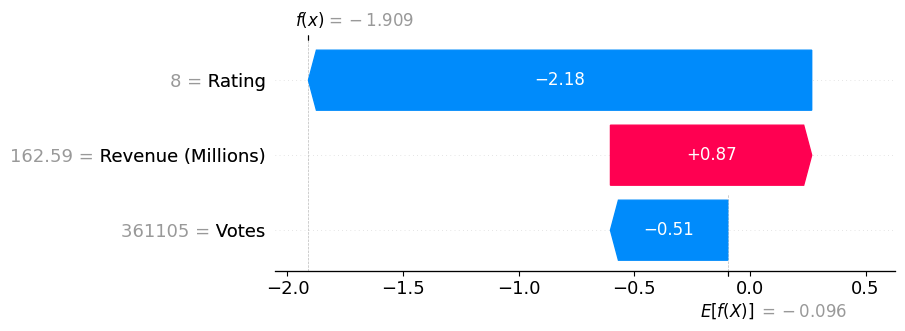

In [108]:
label = 0
idx = 0
shap.waterfall_plot(
    shap.Explanation(
        values=tab_shap_vals2[idx].values[:,label],
        base_values=tab_shap_vals2[idx].base_values[label],
        data=tab_shap_vals2[idx].data,
        feature_names=train_df_tab.columns
    )
)

In [142]:
text_shap_vals[idx]

.values =
array([[ 1.49011612e-08, -1.49011612e-08],
       [-3.08799222e-02,  3.08799222e-02],
       [-2.60929242e-02,  2.60929242e-02],
       [-4.43955436e-02,  4.43955436e-02],
       [-3.77528444e-02,  3.77528444e-02],
       [-1.49011612e-08,  1.49011612e-08]])

.base_values =
array([0.46919829, 0.53080171])

.data =
array(['', 'off', 'beat ', 'romantic ', 'comedy', ''], dtype='<U9')

In [148]:
text_shap_vals.clustering

array([[[1.        , 2.        , 0.33333333, 2.        ],
        [3.        , 4.        , 0.33333333, 2.        ],
        [0.        , 6.        , 0.5       , 3.        ],
        [7.        , 5.        , 0.5       , 3.        ],
        [8.        , 9.        , 1.        , 6.        ]]])

In [151]:
shap.plots.text(shap.Explanation(
        values=text_shap_vals[idx].values,
        base_values=text_shap_vals[idx].base_values,
        data=text_shap_vals[idx].data,
        clustering=text_shap_vals.clustering,
        output_names=['Genre is not Drama', 'Genre is Drama'],
    )
                , grouping_threshold=2)

In [203]:
shap.plots.text(
    shap.Explanation(
        values=text_shap_vals[idx].values,
        base_values=text_shap_vals[idx].base_values,
        data=text_shap_vals[idx].data,
        # clustering=text_shap_vals.clustering[idx],
        output_names=["Genre is not Drama", "Genre is Drama"],
        # hierarchical_values=text_shap_vals[idx].hierarchical_values,
    )
)

In [170]:
[d for d in text_shap_vals.__dir__() if getattr(text_shap_vals, d, []) != []]

elementwise comparison failed; this will raise an error in the future.


['compute_time',
 'output_dims',
 '_s',
 '__module__',
 '__doc__',
 '__init__',
 'shape',
 'values',
 'base_values',
 'data',
 'display_data',
 'instance_names',
 'output_names',
 'output_indexes',
 'feature_names',
 'lower_bounds',
 'upper_bounds',
 'error_std',
 'main_effects',
 'hierarchical_values',
 'clustering',
 'cohorts',
 '__repr__',
 '__getitem__',
 '__len__',
 '__copy__',
 '_apply_binary_operator',
 '__add__',
 '__radd__',
 '__sub__',
 '__rsub__',
 '__mul__',
 '__rmul__',
 '__truediv__',
 '_numpy_func',
 'mean',
 'max',
 'min',
 'sum',
 'hstack',
 'abs',
 'identity',
 'argsort',
 'flip',
 'hclust',
 'sample',
 '_flatten_feature_names',
 '_use_data_as_feature_names',
 'percentile',
 '__dict__',
 '__weakref__',
 '__new__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir_

In [175]:
text_shap_vals.cohorts

<bound method Explanation.cohorts of .values =
array([[[ 1.49011612e-08, -1.49011612e-08],
        [-3.08799222e-02,  3.08799222e-02],
        [-2.60929242e-02,  2.60929242e-02],
        [-4.43955436e-02,  4.43955436e-02],
        [-3.77528444e-02,  3.77528444e-02],
        [-1.49011612e-08,  1.49011612e-08]]])

.base_values =
array([[0.46919829, 0.53080171]])

.data =
(array(['', 'off', 'beat ', 'romantic ', 'comedy', ''], dtype=object),)>

In [164]:
text_shap_vals.__dir__()
# call text_shap_vals.__dir__()[0]

text_shap_vals.__dir__()[0]

'op_history'

In [204]:
shap_vals

.values =
array([[[-0.12221598,  0.12221598],
        [ 0.17356919, -0.17356919],
        [-0.01040681,  0.01040681],
        [ 0.        ,  0.        ],
        [-0.01543996,  0.01543996],
        [-0.01304646,  0.01304646],
        [-0.02219778,  0.02219778],
        [-0.01887642,  0.01887642],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.42731613, 0.57268387]])

.data =
array([[7.7, 398972.0, 32.39, 'offbeat romantic comedy']], dtype=object)

In [217]:
print(shap_vals[idx].values.shape)
print(shap_vals.base_values[idx,label])


(6,)

In [226]:
shap_vals[idx,n_tab_fts:].data

array(['offbeat romantic comedy'], dtype=object)

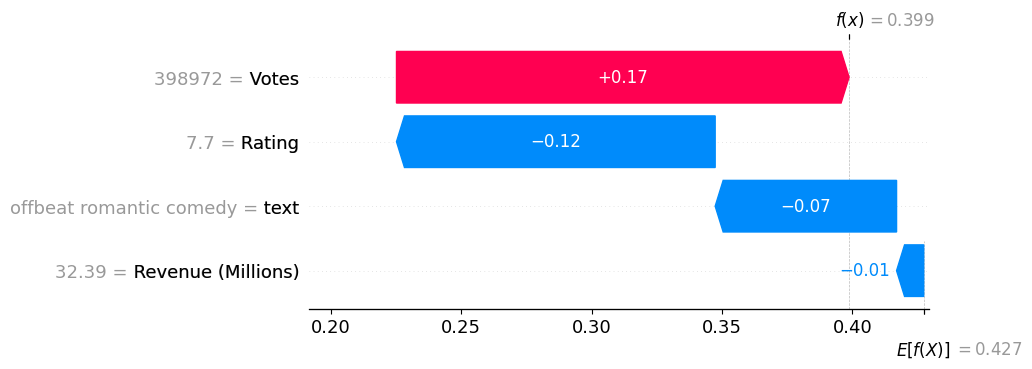

Text Only:


In [238]:
label = 0
idx = 0
n_tab_fts = len(train_df_tab.columns)

new_values = np.zeros((1, n_tab_fts +1, 2))
new_values[:, :n_tab_fts, :] = shap_vals.values[:, :n_tab_fts, :]
new_values[:, n_tab_fts, :] = np.sum(shap_vals.values[:, n_tab_fts:, :], axis=1)

shap.waterfall_plot(
    shap.Explanation(
        values=new_values[idx,:,label],
        base_values=shap_vals.base_values[idx,label],
        data=shap_vals.data[idx],
        feature_names=list(train_df_tab.columns) + ['text']
    )
)

print('Text Only:')

shap.plots.text(
    shap.Explanation(
        values=shap_vals[idx,n_tab_fts:,label].values,
        base_values=shap_vals.base_values[idx,label],
        # data=shap_vals[idx,n_tab_fts:].data,
        data=shap_vals.feature_names[idx][n_tab_fts:],
        # clustering=text_shap_vals.clustering[idx],
        output_names=["Genre is not Drama", "Genre is Drama"],
        # hierarchical_values=text_shap_vals[idx].hierarchical_values,
        feature_names=shap_vals.feature_names[idx][n_tab_fts:],
    )
)


In [233]:
shap.plots.text(
    shap.Explanation(
        values=shap_vals[idx,n_tab_fts:].values,
        base_values=shap_vals.base_values[idx],
        # data=shap_vals[idx,n_tab_fts:].data,
        data=shap_vals.feature_names[idx][n_tab_fts:],
        # clustering=text_shap_vals.clustering[idx],
        output_names=["Genre is not Drama", "Genre is Drama"],
        # hierarchical_values=text_shap_vals[idx].hierarchical_values,
        feature_names=shap_vals.feature_names[idx][n_tab_fts:],
    )
)

In [ ]:
tab_shap_vals2.base_values[1]

IndexError: invalid index to scalar variable.

In [ ]:
tab_shap_vals3[0]

.values =
array([ 2.17651041,  0.50726349, -0.87031176])

.base_values =
0.09580354565476068

.data =
6.3

In [ ]:
shap.plots.waterfall(tab_shap_vals3[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [ ]:
tab_shap_vals2.base_values[0][1]

0.5705799704314203

In [ ]:
type(tab_shap_vals2)

shap._explanation.Explanation

In [ ]:
type(tab_shap_vals)

shap._explanation.Explanation

In [ ]:
tab_shap_vals2[0]

.values =
array([[-0.29332132,  0.29332132],
       [-0.0424427 ,  0.0424427 ],
       [ 0.03540736, -0.03540736]])

.base_values =
array([0.42942003, 0.57057997])

.data =
array([8.00000e+00, 3.61105e+05, 1.62590e+02])

In [ ]:
shap.plots.waterfall(tab_shap_vals2[0][1])
v = tab_shap_vals2[0]
shap.waterfall_plot(v.base_values[1], v.values[1], v.data)

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [ ]:
v.base_values

array([0.42942003, 0.57057997])

In [177]:
import shap
import transformers
import nlp
import torch
import numpy as np
import scipy as sp

# load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
imdb_train = nlp.load_dataset("imdb")["train"]
shap_values = explainer(imdb_train[:10], fixed_context=1)

Downloading: 100%|██████████| 4.56k/4.56k [00:00<00:00, 1.38MB/s]
Downloading: 100%|██████████| 2.07k/2.07k [00:00<00:00, 855kB/s]


Downloading: 100%|██████████| 84.1M/84.1M [00:07<00:00, 11.8MB/s]


Dataset imdb downloaded and prepared to /home/james/.cache/huggingface/datasets/imdb/plain_text/1.0.0/76cdbd7249ea3548c928bbf304258dab44d09cd3638d9da8d42480d1d1be3743. Subsequent calls will reuse this data.


Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors
Partition explainer: 11it [00:29,  4.21s/it]


In [202]:
# plot the first sentence's explanation
shap.plots.text(shap_values[3], grouping_threshold=10)

In [195]:
shap_values.clustering[0]

array([[1.00e+00, 2.00e+00, 1.00e-02, 2.00e+00],
       [4.20e+01, 4.30e+01, 1.00e-02, 2.00e+00],
       [6.70e+01, 6.80e+01, 1.00e-02, 2.00e+00],
       [7.90e+01, 8.00e+01, 1.00e-02, 2.00e+00],
       [8.30e+01, 8.40e+01, 1.00e-02, 2.00e+00],
       [1.66e+02, 1.67e+02, 1.00e-02, 2.00e+00],
       [1.81e+02, 1.82e+02, 1.00e-02, 2.00e+00],
       [1.87e+02, 1.88e+02, 1.00e-02, 2.00e+00],
       [2.00e+02, 3.00e+00, 1.50e-02, 3.00e+00],
       [2.01e+02, 4.40e+01, 1.50e-02, 3.00e+00],
       [2.04e+02, 8.50e+01, 1.50e-02, 3.00e+00],
       [2.05e+02, 1.68e+02, 1.50e-02, 3.00e+00],
       [2.06e+02, 1.83e+02, 1.50e-02, 3.00e+00],
       [4.50e+01, 4.60e+01, 1.00e-02, 2.00e+00],
       [7.70e+01, 7.80e+01, 1.00e-02, 2.00e+00],
       [1.51e+02, 1.52e+02, 1.00e-02, 2.00e+00],
       [1.95e+02, 1.96e+02, 1.00e-02, 2.00e+00],
       [2.13e+02, 4.70e+01, 1.50e-02, 3.00e+00],
       [2.16e+02, 1.97e+02, 1.50e-02, 3.00e+00],
       [4.00e+00, 5.00e+00, 1.00e-02, 2.00e+00],
       [6.00e+00, 7.